Data Science Fundamentals for DCBP, S. Haug, University of Bern

# Coding Task 2

- Deadline (upload to Ilias): 2024-05-14 24:00
- Solutions in lecture on 2024-05-15
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples or let gemini or chatgpt write various solutions for you.


## Subtasks (maximum 12.5 points)

- Upload the 15 images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points]
- What does these images show and why would you like to automate the counting of the colored bins? (Sasha knows what these images are) [about 15 min][max 0 points]
- With some filtering and thresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points]
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun !

1. Upload the 15 images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them

In [ ]:
# Download all the needed packages
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
# from skimage.external.tifffile import TiffFile
import skimage.filters as skf
import skimage.morphology as skm
from PIL import Image




In [ ]:
! pip install heic2png

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from heic2png import HEIC2PNG

In [ ]:
import os

In [ ]:
folder_path = '/content/drive/MyDrive/DSF/images/'

In [ ]:
#retrieves image fila names and saves them as png

for filename in os.listdir(folder_path):
  if filename.endswith(".HEIC"):

    png_image= HEIC2PNG (os.path.join(folder_path, filename))
    png_image.save()

In [ ]:
#prints all filenames in an array
pictures = []
for filename in os.listdir(folder_path):
  if filename.endswith(".png"):
    pictures= pictures+ [filename]
my_array=np.array(pictures)
print(my_array)


['IMG_5382.png' 'IMG_5385.png' 'IMG_5391.png' 'IMG_5386.png'
 'IMG_5387.png' 'IMG_5384.png' 'IMG_5390.png' 'IMG_5388.png'
 'IMG_5389.png' 'IMG_5383.png' 'IMG_5381.png' 'IMG_5392.png'
 'IMG_5379.png' 'IMG_5393.png' 'IMG_5380.png']


2. What does these images show and why would you like to automate the counting of the colored bins?

3. With some filtering and thresholding, write a function which converts the colored bins into nice white segments on a black background for one image.

(4032, 3024, 3) (4032, 3024)


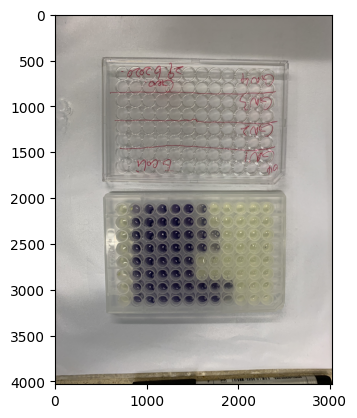

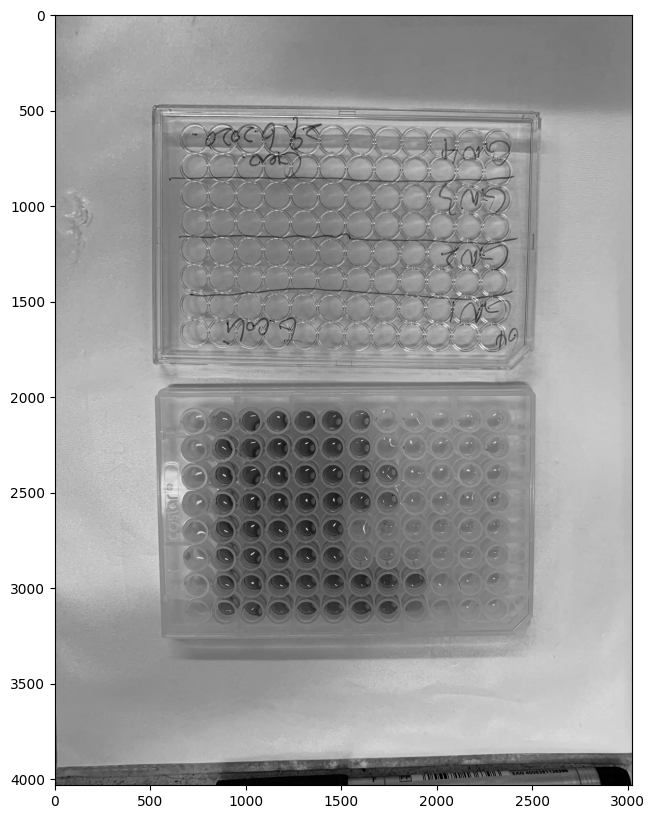

In [ ]:
#load image and show the B channel
imageRGB  = io.imread(folder_path + my_array[3])
plt.imshow(imageRGB)
image = imageRGB[:,:,2]
print(imageRGB.shape,image.shape)
#plot image
plt.figure(figsize=(10,10))
plt.imshow(image,cmap = 'gray')
plt.show()

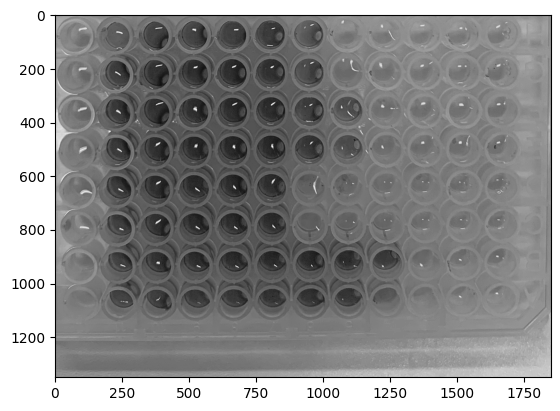

In [ ]:
# We are only interested in the well-plate
crop_box =(650,2050,2500,3400) # (left, upper, right, lower)
image_array = np.array (image)
crop_array = image_array[crop_box[1]:crop_box[3], crop_box[0]: crop_box[2]]
crop_image =Image.fromarray (crop_array)

plt.imshow(crop_image, cmap ='gray')
plt.show()

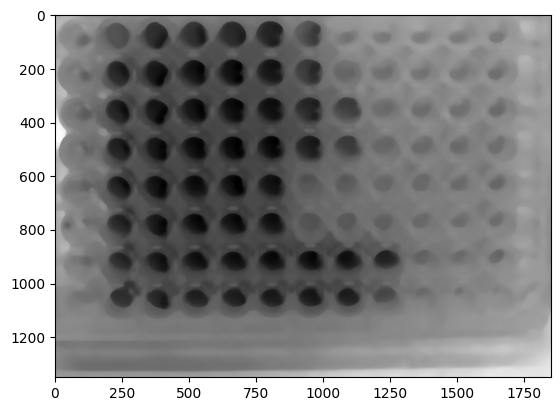

In [ ]:
# There are some reflections or white dots in the black bins. Let's try to get rid of them with a filter.
image_mean = skf.median(crop_image,footprint=skm.disk(20))
plt.imshow(image_mean, cmap ='gray')
plt.show()

In [ ]:
#widgets import *Let us play with the threshold iteractively to find a good value
from ipywidgets import interact
def update(threshold_manual = 120):
  image_threshold = image_mean<threshold_manual
  plt.figure(figsize=(12, 12))
  plt.imshow(image_threshold, cmap ='gray')
  plt.show()

interact(update); # 70 seems to be a good threshold

interactive(children=(IntSlider(value=120, description='threshold_manual', max=360, min=-120), Output()), _dom…

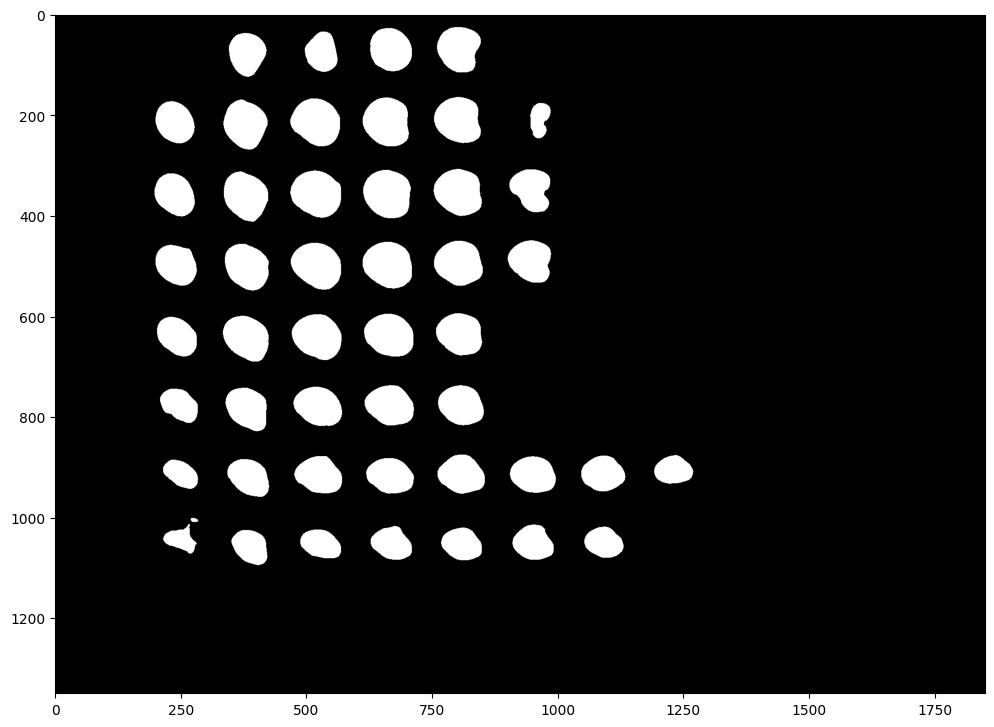

In [ ]:
threshold_manual = 70

#create a mask using a logical operation
image_threshold = image_mean < threshold_manual

plt.figure(figsize=(12, 12))
plt.imshow(image_threshold, cmap ='gray')
plt.show()

4. Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google.

In [ ]:
import cv2

In [ ]:
image=image_threshold.astype(np.uint8)

47

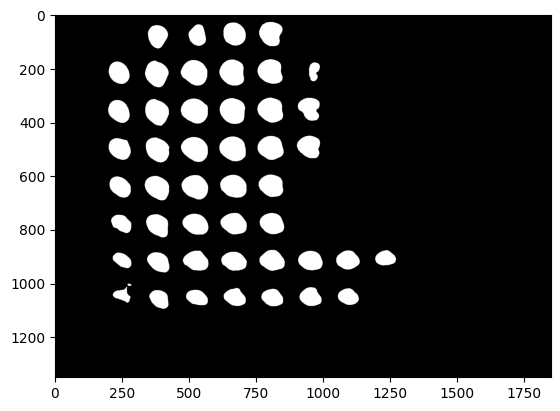

In [ ]:
# Initialize count
def count(image, window_size):
    count = 0

    # Iterate through the image using a sliding window
    for y in range(0, image.shape[0] - window_size[0] + 1, window_size[0]):
        for x in range(0, image.shape[1] - window_size[1] + 1, window_size[1]):
            # Extract the region of interest (window) from the image
            window = image[y:y+window_size[0], x:x+window_size[1]]

            # Count white pixels in the window
            white_pixels = cv2.countNonZero(window)

            # If a quarter of pixels in the window are white, increment count
            if white_pixels > (window_size[0] * window_size[1]) / 4:
                count += 1
    plt.imshow(image, cmap ='gray')
    return count

window = (100, 100) # find a good value by testing it
count (image, window)

5. Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good

47


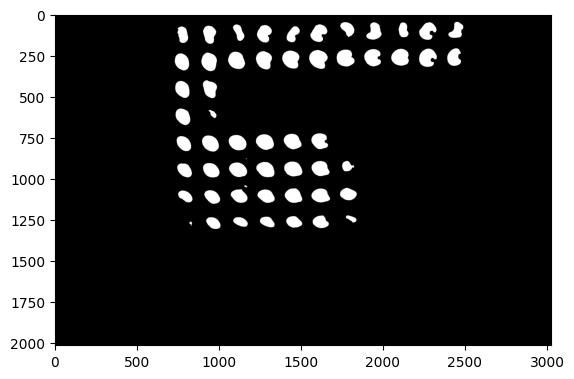

55


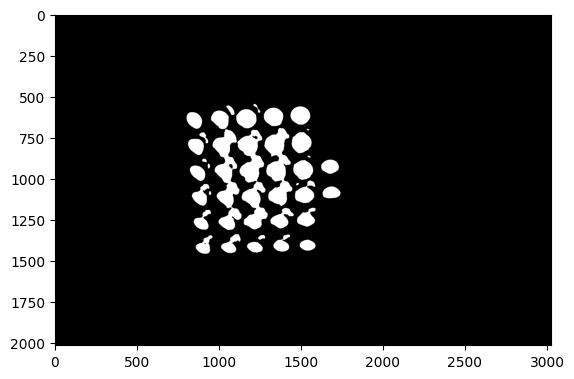

52


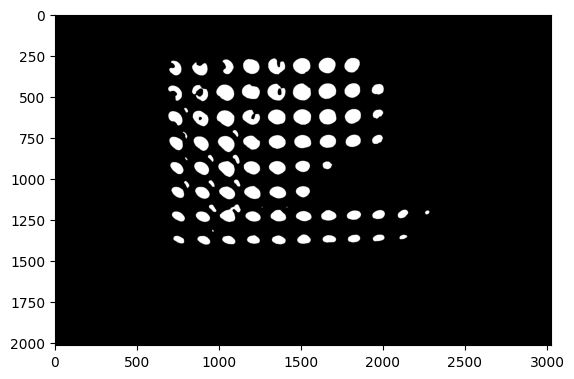

In [ ]:
# same function as used above for counting
# Initialize count
def count(image, window_size):
    count = 0

    # Iterate through the image using a sliding window
    for y in range(0, image.shape[0] - window_size[0] + 1, window_size[0]):
        for x in range(0, image.shape[1] - window_size[1] + 1, window_size[1]):
            # Extract the region of interest (window) from the image
            window = image[y:y+window_size[0], x:x+window_size[1]]

            # Count white pixels in the window
            white_pixels = cv2.countNonZero(window)

            # If the majority of pixels in the window are white, increment count
            if white_pixels > (window_size[0] * window_size[1]) / 4:
                count += 1
    plt.imshow(image, cmap ='gray')
    print(count)

# Take all the images in the folder and counts the wells
for i in range (len(my_array)-1 ):
  imageRGB  = io.imread(folder_path + my_array[i])
  image = imageRGB[:,:,2]

  image = image[image.shape[0]//2:image.shape[0],:] # only the lower half of the picture is needed
  #filtering
  image_mean = skf.median(image,footprint=skm.disk(20))

  threshold_manual = 70

  #create a mask using a logical operation
  image_threshold = image_mean < threshold_manual
  image=image_threshold.astype(np.uint8)

  window = (100, 100)
  count (image, window)


  # show the image
  plt.imshow(image_threshold, cmap ='gray')
  plt.show()






